<a href="https://colab.research.google.com/github/surajbhala/Anomaly-Detection/blob/main/Anomaly_Detection_using_AutoEncoders(Feedforward_NN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

import tensorflow as tf
from tensorflow.keras.models import Model

In [2]:
!wget http://www.timeseriesclassification.com/Downloads/ECG5000.zip
!unzip ECG5000.zip

--2021-05-08 10:31:37--  http://www.timeseriesclassification.com/Downloads/ECG5000.zip
Resolving www.timeseriesclassification.com (www.timeseriesclassification.com)... 109.123.71.232
Connecting to www.timeseriesclassification.com (www.timeseriesclassification.com)|109.123.71.232|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10614407 (10M) [application/zip]
Saving to: ‘ECG5000.zip’

ECG5000.zip         100%[===================>]  10.12M  12.8MB/s    in 0.8s    

2021-05-08 10:31:39 (12.8 MB/s) - ‘ECG5000.zip’ saved [10614407/10614407]

Archive:  ECG5000.zip
  inflating: ECG5000.txt             
  inflating: ECG5000_TEST.arff       
  inflating: ECG5000_TEST.txt        
  inflating: ECG5000_TRAIN.arff      
  inflating: ECG5000_TRAIN.txt       
  inflating: ECG5000_TEST.ts         
  inflating: ECG5000_TRAIN.ts        


In [3]:
!cat ECG5000_TRAIN.txt ECG5000_TEST.txt > ecg_combined.txt

In [4]:
!head ecg_combined.txt

   1.0000000e+00  -1.1252183e-01  -2.8272038e+00  -3.7738969e+00  -4.3497511e+00  -4.3760410e+00  -3.4749863e+00  -2.1814082e+00  -1.8182865e+00  -1.2505219e+00  -4.7749208e-01  -3.6380791e-01  -4.9195659e-01  -4.2185509e-01  -3.0920086e-01  -4.9593870e-01  -3.4211867e-01  -3.5533627e-01  -3.6791303e-01  -3.1650279e-01  -4.1237405e-01  -4.7167181e-01  -4.1345783e-01  -3.6461703e-01  -4.4929829e-01  -4.7141866e-01  -4.2477658e-01  -4.6251673e-01  -5.5247236e-01  -4.7537519e-01  -6.9420000e-01  -7.0186810e-01  -5.9381178e-01  -6.6068415e-01  -7.1383066e-01  -7.6980688e-01  -6.7228161e-01  -6.5367605e-01  -6.3940562e-01  -5.5930228e-01  -5.9167032e-01  -4.9322332e-01  -4.6305183e-01  -3.0164382e-01  -2.3273401e-01  -1.2505488e-01  -1.5394314e-01  -2.4357404e-02  -6.5608758e-02   3.4999258e-02   6.1935219e-02   7.1195420e-02   1.2392505e-01   1.0312371e-01   2.2522849e-01   1.2868305e-01   3.0248315e-01   2.5727621e-01   1.9635161e-01   1.7938297e-01   2.4472863e-01   3.4121687e-01   3.282

In [5]:
df = pd.read_csv('ecg_combined.txt', sep = '  ', header=None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,...,1.173345,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,...,1.557410,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,...,1.640105,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,...,1.553079,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439789,-0.451835,-0.395926,-0.448762,-0.391789,-0.376307,-0.461069,-0.253524,0.213006,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,-0.298107,-0.428928,-0.491351,-0.361304,-0.339296,-0.324952,-0.290113,-0.363051,-0.525684,-0.597423,-0.575523,-0.567503,-0.504555,-0.618406,-0.682814,-0.743849,-0.815588,-0.826902,-0.782374,-0.929462,-0.999672,-1.060969,-1.007877,-1.028735,-1.122629,-1.028650,-1.046515,-1.063372,-1.122423,...,0.982230,1.155363,1.336254,1.627534,1.717594,1.696487,1.741686,1.674078,1.546928,1.331738,1.110168,0.922210,0.521777,0.154852,-0.123861,-0.202998,-0.247956,-0.219122,-0.214695,-0.319215,-0.198597,-0.151618,-0.129593,-0.074939,-0.1

In [7]:
df[0].describe()

count    5000.000000
mean        1.527400
std         0.760372
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: 0, dtype: float64

In [8]:
df = df.add_prefix('col')

In [9]:
df.columns

Index(['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8',
       'col9',
       ...
       'col131', 'col132', 'col133', 'col134', 'col135', 'col136', 'col137',
       'col138', 'col139', 'col140'],
      dtype='object', length=141)

In [11]:
df['col0'].value_counts()

1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: col0, dtype: int64

## 2,3,4 and 5 is abnormal whereas 1 is normal in column 1

In [13]:
train_data, test_data, train_labels, test_labels = train_test_split(df.values,df.values[:,0:1], test_size = 0.2, random_state = 42)

In [14]:
scaler = MinMaxScaler()
data_scaled = scaler.fit(train_data)

In [15]:
train_data_scaled = data_scaled.transform(train_data)
test_data_scaled = data_scaled.transform(test_data)


In [16]:
train_data_scaled

array([[0.25      , 0.53813398, 0.59585633, ..., 0.11775889, 0.0569781 ,
        0.17124168],
       [0.25      , 0.53857438, 0.58850356, ..., 0.26561097, 0.25063599,
        0.22736195],
       [0.        , 0.317557  , 0.18654775, ..., 0.71455568, 0.70718614,
        0.51703033],
       ...,
       [0.        , 0.45442466, 0.35540716, ..., 0.77837157, 0.74294265,
        0.50709418],
       [0.25      , 0.40345124, 0.39132017, ..., 0.4868497 , 0.50193227,
        0.47770011],
       [0.        , 0.37134117, 0.25002207, ..., 0.71048947, 0.65626497,
        0.35023474]])

In [26]:
normal_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
anomaly_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 > 0').values[:,1:]

In [27]:
normal_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
anomaly_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 > 0').values[:,1:]

In [28]:
normal_train_data.shape

(2333, 140)

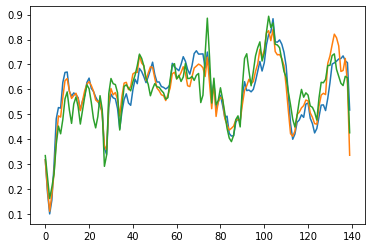

In [31]:
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])

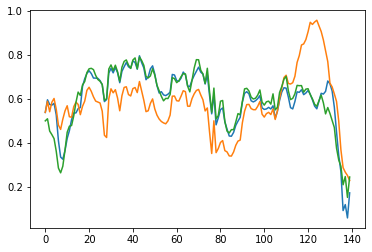

In [32]:
plt.plot(anomaly_train_data[0])
plt.plot(anomaly_train_data[1])
plt.plot(anomaly_train_data[2])

### Anomaly data can be clearly seen to have a not in sync distribution

In [33]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(8,activation='relu')) ## Bottleneck layer
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(140,activation='sigmoid'))

In [42]:
class Auto_Encoder(Model):
  def __init__(self):
    super(Auto_Encoder, self).__init__()
    self.encoder = tf.keras.Sequential([
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(32,activation='relu'),
        tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dense(8,activation='relu')])
    

    self.decoder  = tf.keras.Sequential([
        tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dense(32,activation='relu'),
        tf.keras.layers.Dense(64,activation='relu'),  
        tf.keras.layers.Dense(140,activation='sigmoid')
    ])
  def call(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


In [47]:
model = Auto_Encoder()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=4, mode = 'min')

model.compile(optimizer='adam', loss = 'mae')

In [48]:
history = model.fit(normal_train_data, normal_train_data,
                    epochs = 50,
                    batch_size = 128,
                    validation_data = (train_data_scaled[:,1:], train_data_scaled[:,1:]),
                    shuffle = True,
                    callbacks = [early_stopping])

Epoch 1/50
19/19 [==============================] - 1s 17ms/step - loss: 0.1257 - val_loss: 0.1075
Epoch 2/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0832 - val_loss: 0.0807
Epoch 3/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0528 - val_loss: 0.0753
Epoch 4/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0470 - val_loss: 0.0750
Epoch 5/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0459 - val_loss: 0.0740
Epoch 6/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0463 - val_loss: 0.0741
Epoch 7/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0463 - val_loss: 0.0735
Epoch 8/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0466 - val_loss: 0.0730
Epoch 9/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0458 - val_loss: 0.0729
Epoch 10/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0460 - val_loss: 0.0725
Epoch 11/50
19/19 

In [49]:
encoder_out = model.encoder(normal_test_data).numpy()
decoder_out = model.decoder(encoder_out).numpy()

In [50]:
encoder_out.shape

(586, 8)

In [51]:
decoder_out.shape

(586, 140)

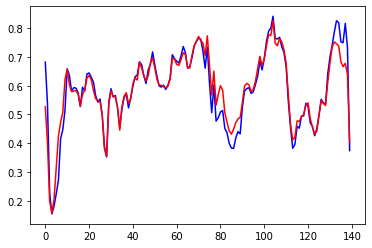

In [52]:
plt.plot(normal_test_data[0],'b')
plt.plot(decoder_out[0],'r')

### The difference between blue and red peak is the reconstruction error

In [53]:
encoder_out_a = model.encoder(anomaly_test_data).numpy()
decoder_out_a = model.decoder(encoder_out_a).numpy()

In [55]:
decoder_out_a.shape

(414, 140)

In [56]:
encoder_out_a.shape

(414, 8)

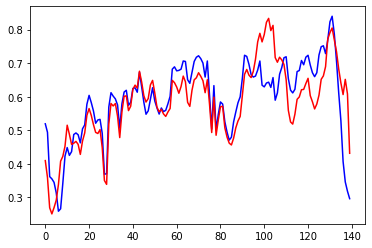

In [57]:
plt.plot(anomaly_test_data[0],'b')
plt.plot(decoder_out_a[0],'r')

### The reconstruction error is more in this case as there is presence of anomaly

(array([ 9., 45., 55., 58., 75., 69., 44., 38., 32., 28., 27., 15., 15.,
        12., 15.,  4., 12.,  6.,  6.,  0.,  5.,  3.,  0.,  2.,  1.,  0.,
         1.,  0.,  0.,  1.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.01164107, 0.01384783, 0.0160546 , 0.01826136, 0.02046813,
        0.0226749 , 0.02488166, 0.02708843, 0.02929519, 0.03150196,
        0.03370872, 0.03591549, 0.03812225, 0.04032902, 0.04253579,
        0.04474255, 0.04694932, 0.04915608, 0.05136285, 0.05356961,
        0.05577638, 0.05798315, 0.06018991, 0.06239668, 0.06460344,
        0.06681021, 0.06901697, 0.07122374, 0.0734305 , 0.07563727,
        0.07784404, 0.0800508 , 0.08225757, 0.08446433, 0.0866711 ,
        0.08887786, 0.09108463, 0.0932914 , 0.09549816, 0.09770493,
        0.09991169, 0.10211846, 0.10432522, 0.10653199, 0.10873875,
        0.11094552, 0.11315229, 0.11535905, 0.11756582, 0.11977258,
        0.12197935]),
 <a list of 50

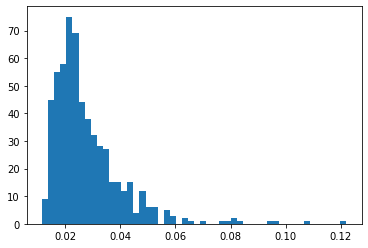

In [58]:
reconstructions = model.predict(normal_test_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_test_data)

plt.hist(train_loss, bins = 50)

In [60]:
np.mean(train_loss)


0.02795519039189983

In [61]:
np.std(train_loss)

0.013005683021972502

In [62]:
threshold = np.mean(train_loss) + 2*np.std(train_loss) ## This is completely based on the business threshold

In [63]:
threshold

0.05396655643584483

In [64]:
reconstructions_a = model.predict(anomaly_test_data)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  6.,
         4., 13., 12., 33., 38., 43., 43., 45., 41., 34., 21., 18., 26.,
        11.,  8.,  2.,  1.,  2.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  2.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([0.01810845, 0.02134873, 0.02458902, 0.02782931, 0.03106959,
        0.03430988, 0.03755017, 0.04079045, 0.04403074, 0.04727103,
        0.05051132, 0.0537516 , 0.05699189, 0.06023218, 0.06347246,
        0.06671275, 0.06995304, 0.07319332, 0.07643361, 0.0796739 ,
        0.08291418, 0.08615447, 0.08939476, 0.09263505, 0.09587533,
        0.09911562, 0.10235591, 0.10559619, 0.10883648, 0.11207677,
        0.11531705, 0.11855734, 0.12179763, 0.12503791, 0.1282782 ,
        0.13151849, 0.13475878, 0.13799906, 0.14123935, 0.14447964,
        0.14771992, 0.15096021, 0.1542005 , 0.15744078, 0.16068107,
        0.16392136, 0.16716164, 0.17040193, 0.17364222, 0.17688251,
        0.18012279]),
 <a list of 50

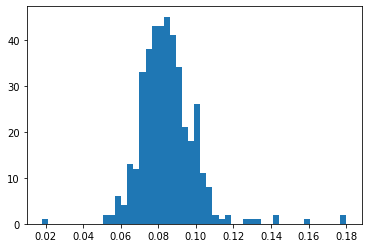

In [65]:
train_loss_a = tf.keras.losses.mae(reconstructions_a, anomaly_test_data)
plt.hist(train_loss_a, bins = 50)

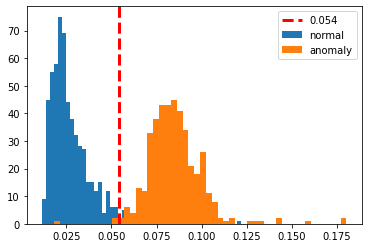

In [67]:
plt.hist(train_loss, bins = 50, label='normal')
plt.hist(train_loss_a, bins = 50, label = 'anomaly')
plt.axvline(threshold, color = 'r', linewidth = 3, linestyle= 'dashed', label = '{:0.3f}'.format(threshold))
plt.legend(loc = 'upper right')
plt.show()

In [68]:
np.mean(train_loss_a)

0.08493910747260841

In [69]:
np.std(train_loss_a)

0.015182354904763065

In [70]:
tf.math.less(train_loss, threshold)

<tf.Tensor: shape=(586,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  Tr

In [71]:
preds = tf.math.less(train_loss, threshold)

In [72]:
tf.math.count_nonzero(preds)

<tf.Tensor: shape=(), dtype=int64, numpy=565>

In [73]:
preds.shape

TensorShape([586])

In [74]:
preds_a = tf.math.greater(train_loss_a, threshold)

In [75]:
tf.math.count_nonzero(preds_a)

<tf.Tensor: shape=(), dtype=int64, numpy=411>

In [76]:
preds_a.shape

TensorShape([414])

In [87]:
percentage_anomaly = float(tf.math.count_nonzero(preds_a) *100/preds_a.shape[0])

In [88]:
print('Correct prediction percentage for anomaly', round(percentage_anomaly,2))

Correct prediction percentage for anomaly 99.28
